## Feature Importance
This module aims at determining the best features that can improve the accuracy of the model.

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets, linear_model, metrics 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns

## Univariate Selection

In [2]:
data = pd.read_csv("Testing.csv")
data = data.drop(['date','FlightDate','airport'],1)
lb = LabelEncoder()
data['Origin'] = lb.fit_transform(data['Origin'])
data['Dest'] = lb.fit_transform(data['Dest'])
del data['Unnamed: 0']
del data['Unnamed: 0.1']
del data['Unnamed: 0.1.1']
X = data.iloc[:,0:21]  
y = data.iloc[:,-1] 
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(25,'Score'))

              Specs         Score
6        CRSDepTime  5.901832e+07
16       round_time  5.889679e+07
4           DepTime  4.845862e+07
10          ArrTime  3.544509e+07
11       CRSArrTime  3.331966e+07
8   OriginAirportID  9.559860e+05
9     DestAirportID  6.031153e+05
7   DepDelayMinutes  2.060157e+05
13  ArrDelayMinutes  9.582767e+04
19      weatherCode  8.864185e+04
17    windspeedKmph  8.371076e+04
18    winddirDegree  5.950781e+04
14           Origin  1.765807e+04
15             Dest  1.053829e+04
20         precipMM  4.557246e+03
5          DepDel15  2.467687e+03
3        DayofMonth  3.967547e+02
2             Month  3.847671e+02
1           Quarter  1.060474e+02
0              Year  5.652170e-02
12         ArrDel15  4.664912e-28


## Heatmap

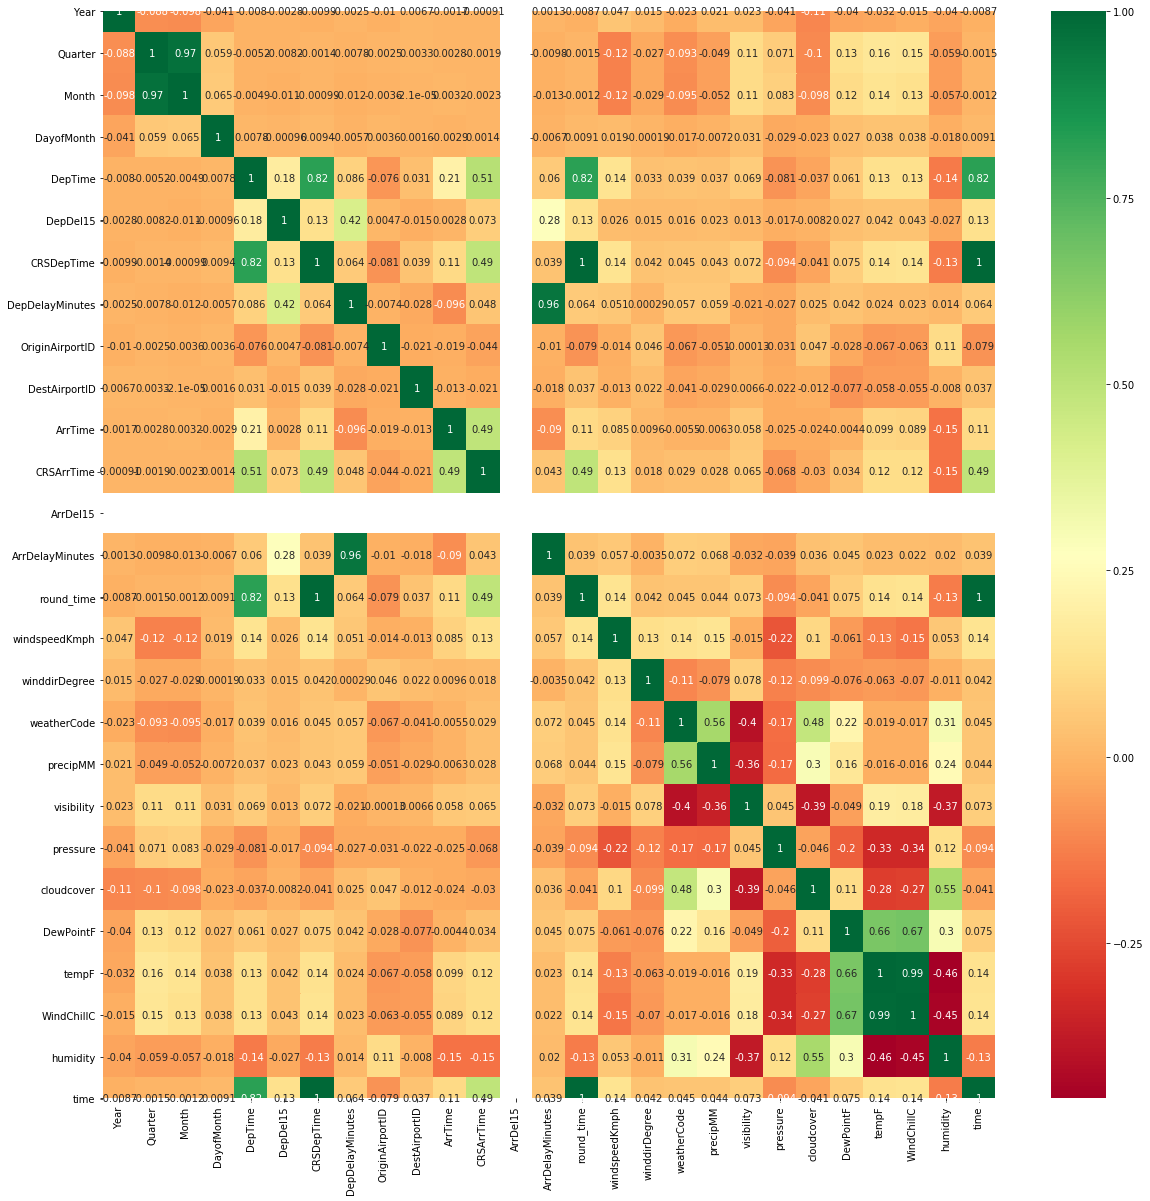

In [8]:
df = pd.read_csv("Testing.csv")
del df['Unnamed: 0']
del df['Unnamed: 0.1']
del df['Unnamed: 0.1.1']
X = df.iloc[:,0:25]
y = df.iloc[:,-1]    
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")